In [1]:
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('outcomes_df6.csv') 

data['Damage In Area'] = (data['Expected Annual Damage'] > 0).astype(int)
data.head()

,Unnamed: 0,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Damage In Area
0,0,7.614090e+06,5.202083e+08,1.043500e+09,1
1,1,4.588159e+07,5.453525e+08,1.027900e+09,1
2,2,0.000000e+00,5.784227e+08,1.080100e+09,0
3,3,0.000000e+00,7.138791e+08,6.138000e+08,0
4,4,0.000000e+00,9.292998e+08,1.049400e+09,0


In [3]:
x = data.iloc[:, 2:4]
print(f"Columns in x: {x.columns.values}")

Columns in x: ['Dike Investment Costs' 'RfR Investment Costs']


In [4]:
y = data.iloc[:, 4].values
print(f"Columns in y: {y}")

Columns in y: [1 1 0 0 0]


In [5]:
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)

y = np.array(y)

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)

box1 = prim_alg.find_box()

[MainProcess/INFO] 5 points remaining, containing 2 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.4, coverage: 1.0, density: 1.0 restricted_dimensions: 1


In [6]:
# Enable matplotlib interactive mode
# %matplotlib notebook

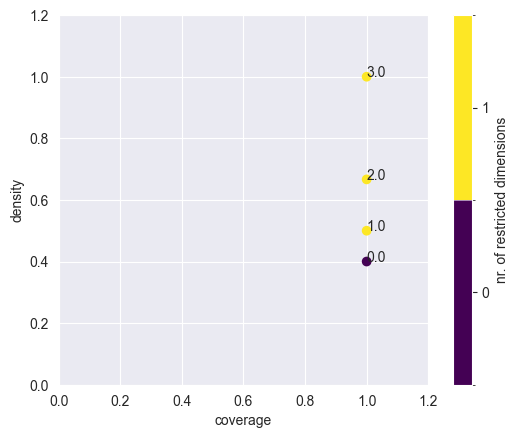

In [7]:
import matplotlib.pyplot as plt
 
box1.show_tradeoff(annotated=True)
plt.show()

In [8]:
point = 2
box1.inspect(point)

coverage    1.000000
density     0.666667
id          2.000000
k           2.000000
mass        0.600000
mean        0.666667
n           3.000000
res_dim     1.000000
Name: 2, dtype: float64

                              box 2                                
                                min           max qp value qp value
Dike Investment Costs  5.202083e+08  6.461509e+08      NaN    0.352


[None]

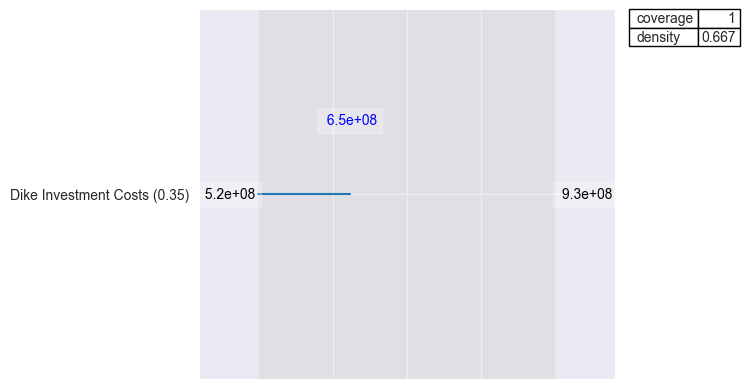

In [10]:
box1.inspect(point, style='graph')
plt.show()

In [11]:
from ema_workbench.analysis import dimensional_stacking

In [13]:
dimensional_stacking.create_pivot_plot(cleaned_experiments, y)

NameError: name 'cleaned_experiments' is not defined